In [1]:
import pandas as pd
import numpy as np

In [2]:
y_train_df = pd.read_csv('y_train.csv')
x_train_df = pd.read_csv('x_train.csv')

In [33]:
len(x_train_df['Пластификатор'].unique())

25

In [10]:
y_test = pd.read_csv('submission_example.csv')
y_test

,id,"Глубина проникания иглы при 0 °С, [мм-1]","Глубина проникания иглы при 25 °С, [мм-1]","Растяжимость при температуре 0 °С, [см]","Температура размягчения, [°С]","Эластичность при 0 °С, [%]"
0,0,30.0,67.6,21.3,64.8,76.2
1,1,33.3,79.7,30.5,67.7,77.7
2,2,33.0,77.5,30.4,71.2,75.0
3,3,33.6,80.4,30.8,70.0,75.8
4,4,33.0,79.4,28.3,74.6,73.9
5,5,33.2,74.3,32.5,74.8,72.7
6,6,31.4,69.3,26.7,75.6,72.8
7,7,30.2,70.4,21.1,71.2,72.3
8,8,34.0,82.9,27.2,68.5,77.4
9,9,30.4,68.7,21.4,68.8,78.0


In [11]:
x_test = pd.read_csv('x_test.csv')
x_test

,id,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Адгезионная добавка,Пластификатор,Полимер,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25
0,0,0.3,93.0,4.434,2.2,0.066,75,Adhesion2,Plasticizer4,Polymer2,119,75.0
1,1,0.3,86.3,10.619,2.7,0.081,75,Adhesion2,Plasticizer18,Polymer1,181,75.0
2,2,0.3,90.2,6.307,3.1,0.093,75,Adhesion2,Plasticizer11,Polymer4,138,75.0
3,3,0.0,88.9,7.598,3.4,0.102,75,Отсутствует,Plasticizer19,Polymer1,151,75.0
4,4,0.0,89.4,6.789,3.7,0.111,75,Отсутствует,Plasticizer19,Polymer4,143,75.0
5,5,0.3,90.7,4.777,4.1,0.123,75,Adhesion4,Plasticizer19,Polymer3,123,75.0
6,6,0.3,91.3,4.486,3.8,0.114,75,Adhesion4,Plasticizer19,Polymer1,120,75.0
7,7,0.3,92.6,3.804,3.2,0.096,75,Adhesion4,Plasticizer21,Polymer1,113,75.0
8,8,0.0,95.0,2.528,2.4,0.072,75,Отсутствует,Plasticizer23,Polymer1,100,75.0
9,9,0.0,94.0,3.013,2.9,0.087,75,Отсутствует,Plasticizer18,Polymer1,105,75.0


In [12]:
y_train_df

,id,"Глубина проникания иглы при 0 °С, [мм-1]","Глубина проникания иглы при 25 °С, [мм-1]","Растяжимость при температуре 0 °С, [см]","Температура размягчения, [°С]","Эластичность при 0 °С, [%]"
0,0,33.0,71.0,21.0,74.4,73.0
1,1,32.0,71.0,16.0,72.8,75.0
2,2,35.0,76.0,27.0,74.0,78.0
3,3,30.0,65.0,13.0,75.0,75.0
4,4,32.0,66.0,14.0,75.0,77.0
...,...,...,...,...,...,...
103,103,34.0,71.0,50.0,74.0,NaN
104,104,32.0,71.0,24.7,74.0,NaN
105,105,31.0,72.0,24.0,73.0,NaN
106,106,32.0,65.0,16.0,75.0,NaN


In [13]:
x_train_df

,id,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Адгезионная добавка,Пластификатор,Полимер,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25
0,0,0.000,90.400,5.900,3.600,0.100,79,Отсутствует,Plasticizer1,Polymer1,138,75
1,1,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer2,Polymer2,138,75
2,2,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer3,Polymer2,138,75
3,3,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75
4,4,0.300,89.000,7.000,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75
...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,0.300,89.944,5.899,3.749,0.108,79,Adhesion1,Plasticizer24,Polymer2,139,75
104,104,0.300,88.925,6.917,3.750,0.108,71,Adhesion1,Plasticizer24,Polymer2,105,75
105,105,0.293,91.142,5.206,3.270,0.089,72,Adhesion1,Plasticizer24,Polymer2,103,75
106,106,0.311,91.652,4.040,3.885,0.112,79,Adhesion4,Plasticizer24,Polymer2,118,75


In [14]:
total_df = pd.DataFrame.merge(x_train_df, y_train_df, how='inner')

In [15]:
total_df

,id,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Адгезионная добавка,Пластификатор,Полимер,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25,"Глубина проникания иглы при 0 °С, [мм-1]","Глубина проникания иглы при 25 °С, [мм-1]","Растяжимость при температуре 0 °С, [см]","Температура размягчения, [°С]","Эластичность при 0 °С, [%]"
0,0,0.000,90.400,5.900,3.600,0.100,79,Отсутствует,Plasticizer1,Polymer1,138,75,33.0,71.0,21.0,74.4,73.0
1,1,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer2,Polymer2,138,75,32.0,71.0,16.0,72.8,75.0
2,2,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer3,Polymer2,138,75,35.0,76.0,27.0,74.0,78.0
3,3,0.300,90.100,5.900,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75,30.0,65.0,13.0,75.0,75.0
4,4,0.300,89.000,7.000,3.600,0.100,79,Adhesion1,Plasticizer4,Polymer2,138,75,32.0,66.0,14.0,75.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,0.300,89.944,5.899,3.749,0.108,79,Adhesion1,Plasticizer24,Polymer2,139,75,34.0,71.0,50.0,74.0,NaN
104,104,0.300,88.925,6.917,3.750,0.108,71,Adhesion1,Plasticizer24,Polymer2,105,75,32.0,71.0,24.7,74.0,NaN
105,105,0.293,91.142,5.206,3.270,0.089,72,Adhesion1,Plasticizer24,Polymer2,103,75,31.0,72.0,24.0,73.0,NaN
106,106,0.311,91.652,4.040,3.885,0.112,79,Adhesion4,Plasticizer24,Polymer2,118,75,32.0,65.0,16.0,75.0,NaN


In [16]:
total_df[['Адгезионная добавка','Пластификатор','Полимер']]=total_df[['Адгезионная добавка','Пластификатор','Полимер']].apply(lambda x: pd.factorize(x)[0])

<AxesSubplot:>

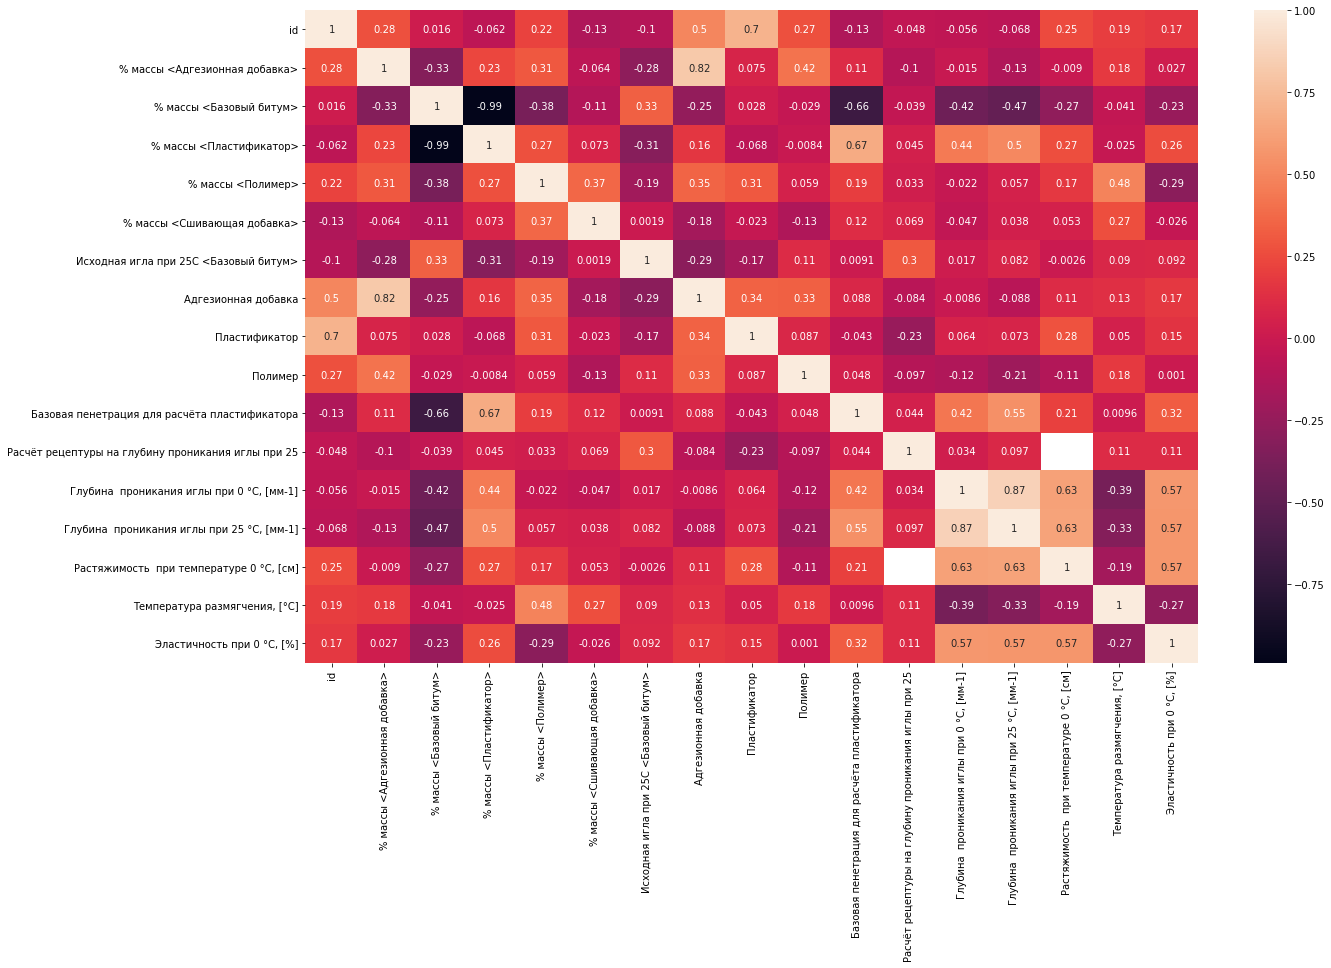

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица корреляции
# Где data - ваш датасет
correlation_matrix = total_df.corr()

# Выводим признаки на тепловую карту
plt.figure(figsize= (20, 12))
sns.heatmap(correlation_matrix, annot = True)

In [18]:
marks = pd.DataFrame(columns=['Сode_agez', 'Code_plast', 'Code_poly'])
marks[['Сode_agez', 'Code_plast', 'Code_poly']] = x_train_df[['Адгезионная добавка','Пластификатор','Полимер']].apply(lambda x: pd.factorize(x)[0])
marks = marks.apply(lambda listing: [str(x) for x in listing])
marks['id'] = [x for x in range(len(marks))]

names = x_train_df[['Адгезионная добавка','Пластификатор','Полимер']]
names['id'] = [x for x in range(len(marks))]

data = pd.DataFrame.merge(marks, names, how='inner')
data

<ipython-input-18-09ba5b97ad75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names['id'] = [x for x in range(len(marks))]


,Сode_agez,Code_plast,Code_poly,id,Адгезионная добавка,Пластификатор,Полимер
0,0,0,0,0,Отсутствует,Plasticizer1,Polymer1
1,1,1,1,1,Adhesion1,Plasticizer2,Polymer2
2,1,2,1,2,Adhesion1,Plasticizer3,Polymer2
3,1,3,1,3,Adhesion1,Plasticizer4,Polymer2
4,1,3,1,4,Adhesion1,Plasticizer4,Polymer2
...,...,...,...,...,...,...,...
103,1,23,1,103,Adhesion1,Plasticizer24,Polymer2
104,1,23,1,104,Adhesion1,Plasticizer24,Polymer2
105,1,23,1,105,Adhesion1,Plasticizer24,Polymer2
106,4,23,1,106,Adhesion4,Plasticizer24,Polymer2


In [19]:
data.to_csv('encoding.csv')

In [20]:
y_train_df = pd.read_csv('y_train.csv')
x_train_df = pd.read_csv('x_train.csv')
total_df = pd.DataFrame.merge(x_train_df, y_train_df, how='inner')
total_df = total_df.fillna(0.0)
total_df = total_df.drop('id', axis=1)

encoding = pd.read_csv('encoding.csv')
encoding = encoding.drop('Unnamed: 0', axis=1)

def encode_agez(x):
    sample = encoding[encoding['Адгезионная добавка'] == x]['Сode_agez']
    microsample = sample.values[0]
    if len(sample) > 1:
        microsample = sample.values[0]
    return microsample

def encode_poly(x):
    sample = encoding[encoding['Полимер'] == x]['Code_poly']
    microsample = sample.values[0]
    if len(sample) > 1:
        microsample = sample.values[0]
    return microsample

def encode_plastif(x):
    sample = encoding[encoding['Пластификатор'] == x]['Code_plast']
    microsample = sample.values[0]
    if len(sample) > 1:
        microsample = sample.values[0]
    return microsample    
    
def set_Encoding(df):
    df['Адгезионная добавка'] = df['Адгезионная добавка'].apply(encode_agez)
    df['Пластификатор'] = df['Пластификатор'].apply(encode_plastif)
    df['Полимер'] = df['Полимер'].apply(encode_poly)
    return df

resulting = set_Encoding(total_df)

x_test = pd.read_csv('x_test.csv')
x_test = set_Encoding(x_test)


from sklearn.model_selection import train_test_split

X_train = total_df[['% массы <Адгезионная добавка>', '% массы <Базовый битум>',
       '% массы <Пластификатор>', '% массы <Полимер>',
       '% массы <Сшивающая добавка>', 'Исходная игла при 25С <Базовый битум>',
       'Адгезионная добавка', 'Пластификатор', 'Полимер',
       'Базовая пенетрация для расчёта пластификатора',
       'Расчёт рецептуры на глубину проникания иглы при 25']]

Y_train = total_df[['Глубина  проникания иглы при 0 °С, [мм-1]',
       'Глубина  проникания иглы при 25 °С, [мм-1]',
       'Растяжимость  при температуре 0 °С, [см]',
       'Температура размягчения, [°С]', 'Эластичность при 0 °С, [%]']]

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

X_real_test = x_test[['% массы <Адгезионная добавка>', '% массы <Базовый битум>',
       '% массы <Пластификатор>', '% массы <Полимер>',
       '% массы <Сшивающая добавка>', 'Исходная игла при 25С <Базовый битум>',
       'Адгезионная добавка', 'Пластификатор', 'Полимер',
       'Базовая пенетрация для расчёта пластификатора',
       'Расчёт рецептуры на глубину проникания иглы при 25']]

tensored_X_train = []
for row in X_train.iterrows():
    tensored_X_train.append(row[1].values)

tensored_X_train = np.array(tensored_X_train)

tensored_Y_train = []
for row in Y_train.iterrows():
    tensored_Y_train.append(row[1].values)

tensored_Y_train = np.array(tensored_Y_train)

tensored_X_test = []
for row in X_test.iterrows():
    tensored_X_test.append(row[1].values)

tensored_X_test = np.array(tensored_X_test)

tensored_Y_test = []
for row in Y_test.iterrows():
    tensored_Y_test.append(row[1].values)

tensored_Y_test = np.array(tensored_Y_test)

import pandas as pd
import numpy as np
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.linear_model import MultiTaskLassoCV


import time

multi_output_clf = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
multi_output_clf.fit(tensored_X_train, tensored_Y_train)

extra_trees_clf = MultiOutputRegressor(ExtraTreesRegressor(n_estimators=150, max_depth=15, min_samples_split=2))
extra_trees_clf.fit(tensored_X_train, tensored_Y_train)

sgd_clf = MultiOutputRegressor(SGDRegressor(tol=1e-3, random_state=0))
sgd_clf.fit(StandardScaler().fit_transform(tensored_X_train), StandardScaler().fit_transform(tensored_Y_train))

ARD_clf = MultiOutputRegressor(linear_model.ARDRegression())
ARD_clf.fit(tensored_X_train, tensored_Y_train)

BayesRidge_clf = MultiOutputRegressor(linear_model.BayesianRidge())
BayesRidge_clf.fit(tensored_X_train, tensored_Y_train)

LassoCV_clf = MultiTaskLassoCV()
LassoCV_clf.fit(tensored_X_train, tensored_Y_train)

NNMLPRegressor_clf = MLPRegressor()
NNMLPRegressor_clf.fit(tensored_X_train, tensored_Y_train)

Y_predicted = multi_output_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('GradientBoostingRegressor -- ' + str(rms))

Y_predicted = extra_trees_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('ExtraTreesRegressor -- ' + str(rms))

Y_predicted = sgd_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('SDG -- ' + str(rms))

Y_predicted = ARD_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('ARD -- ' + str(rms))

Y_predicted = BayesRidge_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('BayesRidge -- ' + str(rms))

Y_predicted = LassoCV_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('LassoCV -- ' + str(rms))

Y_predicted = NNMLPRegressor_clf.predict(tensored_X_test)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
print('NNMLPRegressor -- ' + str(rms))

GradientBoostingRegressor -- 15.31514748845282
ExtraTreesRegressor -- 12.1740673691121
SDG -- 46.515531141766786
ARD -- 13.924094561527056
BayesRidge -- 14.141441564185673
LassoCV -- 13.743427467795666
NNMLPRegressor -- 18.856727623398427


In [25]:
total_df[['Адгезионная добавка', 
          'Пластификатор', 
          'Полимер',
          'Глубина  проникания иглы при 0 °С, [мм-1]',
           'Глубина  проникания иглы при 25 °С, [мм-1]',
           'Растяжимость  при температуре 0 °С, [см]',
            'Температура размягчения, [°С]', 
          'Эластичность при 0 °С, [%]']].to_csv('reverse_dataset.csv')

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import BayesianRidge,LassoCV,ElasticNetCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

piper_svr =Pipeline([('scl', StandardScaler()),('pca',PCA()),
        ('svr', MultiOutputRegressor(SVR()))])
piper_bay =Pipeline([('scl', StandardScaler()),('pca',PCA()),
        ('bay', MultiOutputRegressor(BayesianRidge()))])
piper_lass =Pipeline([('scl', StandardScaler()),('pca',PCA()),
        ('lass', MultiOutputRegressor(LassoCV()))])
piper_elas =Pipeline([('scl', StandardScaler()),('pca',PCA()),
        ('elas', MultiOutputRegressor(ElasticNetCV()))])
piper_rid =Pipeline([('scl', StandardScaler()),('pca',PCA()),
        ('rid', MultiOutputRegressor(RidgeCV()))])
piper_dec =Pipeline([('scl', StandardScaler()),('pca',PCA()),
        ('dec', MultiOutputRegressor(DecisionTreeRegressor()))])

grid_param_svr = {
    
    'svr__estimator__C': [0.1,1,10],
    'pca__n_components': [x for x in range(1,11)]
}
grid_param_bay = {
    
#     'bay__alpha_1': [0.001,0.01,0.1],
#     'bay__alpha_2': [0.001,0.01,0.1],
    'pca__n_components': [x for x in range(1,11)]
}
grid_param_lass={
#     'lass__eps':[0.001,0.01],
    'pca__n_components': [x for x in range(1,11)]
}
grid_param_rid={
#     'rid__eps':[0.01,1,10],
    'pca__n_components': [x for x in range(1,11)]
}
grid_param_elas={
#     'elas__l1_ratio':[.1, .5, .7, .9, .95, .99, 1],
    'pca__n_components': [x for x in range(1,11)],
#     'elas__eps':[0.001,0.01]
}
grid_para_dec={
#     'dec__max_depth':[x for x in range(3,6)],
    'pca__n_components': [x for x in range(1,11)]
    
}

svr_grid_search = GridSearchCV(estimator=piper_svr,
        param_grid=grid_param_svr,
        scoring='accuracy',
        cv=3)
bay_grid_search = GridSearchCV(estimator=piper_bay,
        param_grid=grid_param_bay,
        scoring='accuracy',
        cv=3)
lass_grid_search = GridSearchCV(estimator=piper_lass,
        param_grid=grid_param_lass,
        scoring='accuracy',
        cv=3)
rid_grid_search = GridSearchCV(estimator=piper_rid,
        param_grid=grid_param_rid,
        scoring='accuracy',
        cv=3)
elas_grid_search = GridSearchCV(estimator=piper_elas,
        param_grid=grid_param_elas,
        scoring='accuracy',
        cv=3)
dec_grid_search = GridSearchCV(estimator=piper_dec,
        param_grid=grid_para_dec,
        scoring='accuracy',
        cv=3)

import warnings
from sklearn.exceptions import DataConversionWarning

grid_results = []
grids = [svr_grid_search, bay_grid_search, lass_grid_search, rid_grid_search, elas_grid_search, dec_grid_search]
for pipe in grids:
    pipe.fit(tensored_X_train,tensored_Y_train)
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)
    grid_results.append(pipe.predict(tensored_X_test))
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4884244728232261, tolerance: 0.39728720000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.497338299173407, tolerance: 0.39728720000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8537779628481985, tolerance: 0.39728720000000006
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\zhiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

KeyboardInterrupt: 

In [ ]:
grid_results

In [ ]:
from sklearn.metrics import mean_squared_error
names = ['svr', 'bay', 'lass', 'elas', 'rid', 'dec']

for Y_predicted, name in zip(grid_results, names):
    rms = mean_squared_error(tensored_Y_test, Y_predicted, squared=False)
    print(f'{name} -- ' + str(rms))

In [ ]:
predicted_to_csv = extra_trees_clf.predict(tensored_X_real_test)
result = pd.DataFrame(predicted_to_csv, columns=Y_train.columns)
result['id'] = [x for x in range(len(X_real_test))]
result.to_csv('result.csv', sep=',', encoding='utf-8', index=False)
result

In [ ]:
df = pd.read_csv('result.csv')
df

In [26]:
X_test

,% массы <Адгезионная добавка>,% массы <Базовый битум>,% массы <Пластификатор>,% массы <Полимер>,% массы <Сшивающая добавка>,Исходная игла при 25С <Базовый битум>,Адгезионная добавка,Пластификатор,Полимер,Базовая пенетрация для расчёта пластификатора,Расчёт рецептуры на глубину проникания иглы при 25
77,0.300,89.742,6.100,3.750,0.108,70,3,23,1,137,75
10,0.300,90.100,5.900,3.600,0.100,79,1,8,1,138,75
4,0.300,89.000,7.000,3.600,0.100,79,1,3,1,138,75
83,0.300,91.442,4.400,3.750,0.108,79,3,23,1,130,75
62,0.300,90.613,5.497,3.548,0.042,80,1,17,0,135,75
67,0.000,89.402,6.799,3.699,0.100,71,0,23,1,140,75
30,0.000,89.300,7.000,3.600,0.100,75,0,3,0,138,75
45,0.300,90.242,5.600,3.750,0.108,78,3,23,0,134,75
95,0.300,90.542,5.300,3.750,0.108,72,3,18,1,132,75
11,0.300,90.100,5.900,3.600,0.100,79,1,9,1,138,75


In [29]:
tensored_X_train

array([[0.0000e+00, 9.0201e+01, 6.0990e+00, 3.6000e+00, 1.0000e-01,
        8.0000e+01, 0.0000e+00, 1.7000e+01, 0.0000e+00, 1.4000e+02,
        7.5000e+01],
       [0.0000e+00, 8.9300e+01, 7.0000e+00, 3.6000e+00, 1.0000e-01,
        7.5000e+01, 0.0000e+00, 1.8000e+01, 0.0000e+00, 1.3800e+02,
        7.5000e+01],
       [0.0000e+00, 9.0000e+01, 6.3000e+00, 3.6000e+00, 1.0000e-01,
        7.5000e+01, 0.0000e+00, 1.6000e+01, 0.0000e+00, 1.3800e+02,
        7.5000e+01],
       [0.0000e+00, 8.8300e+01, 8.0000e+00, 3.6000e+00, 1.0000e-01,
        7.5000e+01, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.3800e+02,
        7.5000e+01],
       [3.0000e-01, 8.9642e+01, 6.2000e+00, 3.7500e+00, 1.0800e-01,
        7.2000e+01, 3.0000e+00, 2.3000e+01, 1.0000e+00, 1.3400e+02,
        7.5000e+01],
       [3.0000e-01, 8.8761e+01, 7.1990e+00, 3.6990e+00, 4.1000e-02,
        6.8000e+01, 4.0000e+00, 2.3000e+01, 1.0000e+00, 1.4200e+02,
        7.5000e+01],
       [0.0000e+00, 9.0000e+01, 6.3000e+00, 3.6000e+00, 1.